In [5]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain-groq

%pip install -U:

    %pip: The magic version of the pip command, which ensures the installation happens in the same environment the notebook is using.
    -U: Stands for "upgrade"; it installs the latest versions of the specified packages.

### State
- This where all the agents pass the information in the graph network.
- Each agent may just use the state variables or alter it according to the requirements

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    temperature=1,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


### Adding Graph Nodes

In [3]:

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

### Adding Grpah edges

In [4]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [5]:
graph = graph_builder.compile()

### visualizing the Graph

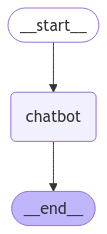

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### Now let's run the chatbot!

- Tip: You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [7]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


In [8]:

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: It seems like you haven't asked a question yet. If you have any questions or need assistance, feel free to ask.
Assistant: It seems like you haven't asked a question yet. What would you like to know or discuss? I'm here to help.
Assistant: Writing good code involves a combination of design principles, coding techniques, and best practices. Here are some tips to help you write high-quality code:

1. **Follow the DRY principle (Don't Repeat Yourself)**: Avoid duplicating code by extracting common logic into reusable functions or classes.
2. **Use meaningful variable names**: Choose names that accurately describe the variable's purpose and are easy to read.
3. **Keep it simple and concise**: Break down complex logic into smaller, manageable pieces, and simplify code where possible.
4. **Use functions and modules**: Organize code into logical functions and modules to improve reusability and maintainability.
5. **Optimize for readability**: Use whitespace, indentation, and line b